<a href="https://colab.research.google.com/github/MosesIbe23/CSE_450_Private/blob/main/Copy_of_starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
train_data = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv')

for col in campaign.columns:
  if campaign[col].dtype == 'object':
    campaign[col] = campaign[col].astype('category')
  elif campaign[col].dtype == 'int64':
    campaign[col] = campaign[col].astype('float64')

campaign.replace('unknown', np.nan, inplace = True)
campaign.head()

for col in train_data.columns:
  if train_data[col].dtype == 'object':
    train_data[col] = train_data[col].astype('category')
  elif train_data[col].dtype == 'int64':
    train_data[col] = train_data[col].astype('float64')

train_data.replace('unknown', np.nan, inplace = True)
train_data.head()

for col in test_data.columns:
  if test_data[col].dtype == 'object':
    test_data[col] = test_data[col].astype('category')
  elif test_data[col].dtype == 'int64':
    test_data[col] = test_data[col].astype('float64')

test_data.replace('unknown', np.nan, inplace = True)
test_data.head()

#campaign.info()
#campaign.describe()

<ipython-input-46-de0025b511db>:22: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  campaign.replace('unknown', np.nan, inplace = True)
<ipython-input-46-de0025b511db>:31: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  train_data.replace('unknown', np.nan, inplace = True)
<ipython-input-46-de0025b511db>:40: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  tes

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,26.0,blue-collar,married,basic.9y,NaN,yes,no,cellular,jul,tue,2.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
1,33.0,admin.,married,high.school,no,yes,no,cellular,may,tue,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1
2,45.0,admin.,divorced,university.degree,no,no,yes,cellular,jun,wed,1.0,3.0,2.0,success,-1.7,94.055,-39.8,0.739,4991.6
3,37.0,admin.,divorced,high.school,no,yes,no,telephone,jun,fri,12.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,34.0,admin.,single,high.school,no,no,no,cellular,nov,wed,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8


In [ ]:
campaign1 = campaign.dropna()
campaign1

train_data1 = train_data.dropna()
train_data1

test_data1 = test_data.dropna()
test_data1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
1,33.0,admin.,married,high.school,no,yes,no,cellular,may,tue,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1
2,45.0,admin.,divorced,university.degree,no,no,yes,cellular,jun,wed,1.0,3.0,2.0,success,-1.7,94.055,-39.8,0.739,4991.6
3,37.0,admin.,divorced,high.school,no,yes,no,telephone,jun,fri,12.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,34.0,admin.,single,high.school,no,no,no,cellular,nov,wed,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8
5,60.0,technician,married,basic.4y,no,yes,no,cellular,oct,tue,2.0,6.0,1.0,success,-3.4,92.431,-26.9,0.737,5017.5


In [ ]:
train_data1_enc = pd.get_dummies(train_data1, drop_first= True)
train_data1_enc

test_data1_enc = pd.get_dummies(test_data, drop_first= True)
test_data1_enc = test_data1_enc.reindex(columns = train_data1_enc.columns, fill_value=0)
test_data1_enc

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,26.0,2.0,999.0,0.0,1.4,93.918,-42.7,4.962,5228.1,True,...,False,False,False,False,False,True,False,True,False,0
1,33.0,1.0,999.0,0.0,-1.8,92.893,-46.2,1.344,5099.1,False,...,False,False,False,False,False,True,False,True,False,0
2,45.0,1.0,3.0,2.0,-1.7,94.055,-39.8,0.739,4991.6,False,...,False,False,False,False,False,False,True,False,True,0
3,37.0,12.0,999.0,0.0,1.4,94.465,-41.8,4.959,5228.1,False,...,False,False,False,False,False,False,False,True,False,0
4,34.0,1.0,999.0,0.0,-0.1,93.200,-42.0,4.120,5195.8,False,...,True,False,False,False,False,False,True,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,41.0,2.0,999.0,0.0,-1.8,92.893,-46.2,1.334,5099.1,True,...,False,False,False,False,False,False,True,True,False,0
4115,42.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,False,True,False,False,False,True,False,0
4116,36.0,2.0,999.0,0.0,1.4,94.465,-41.8,4.960,5228.1,False,...,False,False,False,True,False,False,False,True,False,0
4117,27.0,1.0,6.0,1.0,-1.8,93.369,-34.8,0.652,5008.7,False,...,False,False,False,True,False,False,False,False,True,0


In [ ]:
x = train_data1_enc.drop('y_yes', axis = 1)
y = train_data1_enc['y_yes']

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 42)

rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state= 42, class_weight='balanced')
#rfmodel = DecisionTreeClassifier(criterion='entropy',max_depth=4, class_weight='balanced')
rfmodel.fit(X_train, y_train)

y_pred = rfmodel.predict(X_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(accuracy_score(y_val, y_pred))


              precision    recall  f1-score   support

       False       0.91      0.96      0.94      4832
        True       0.55      0.32      0.40       664

    accuracy                           0.89      5496
   macro avg       0.73      0.64      0.67      5496
weighted avg       0.87      0.89      0.87      5496

[[4661  171]
 [ 453  211]]
0.8864628820960698



Test Set Predictions (First 10):
[False False  True False False  True False False False False]

Confusion Matrix:
[[4661  171]
 [ 453  211]]

Accuracy: 0.8864628820960698


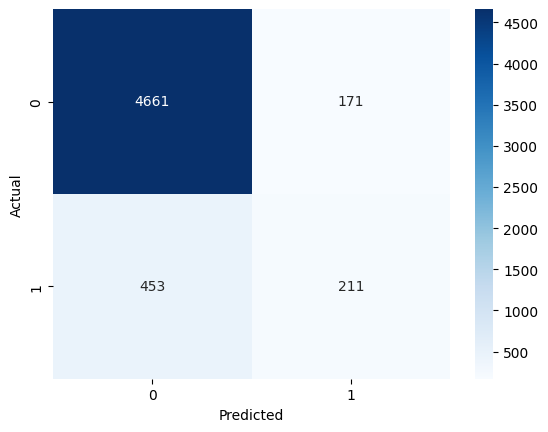

In [ ]:
x_test1 = test_data1_enc.drop('y_yes', axis = 1)

y_test_pred = rfmodel.predict(x_test1)
print("\nTest Set Predictions (First 10):")
print(y_test_pred[:10])

x_test1['y_prediction'] = y_test_pred.astype(int)
x_test1.head()

x_test1[['y_prediction']].to_csv('prediction.csv', index = False)

cm = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:")
print(cm)

accuracy = accuracy_score(y_val, y_pred)
print("\nAccuracy:", accuracy)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


              precision    recall  f1-score   support

       False       0.94      0.86      0.90      4832
        True       0.38      0.62      0.47       664

    accuracy                           0.83      5496
   macro avg       0.66      0.74      0.69      5496
weighted avg       0.88      0.83      0.85      5496

[[4153  679]
 [ 249  415]]
0.8311499272197962


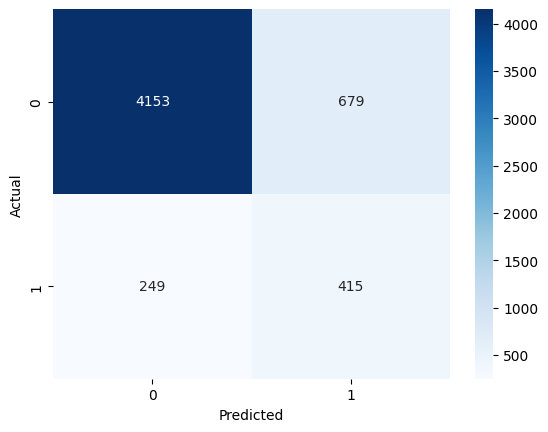

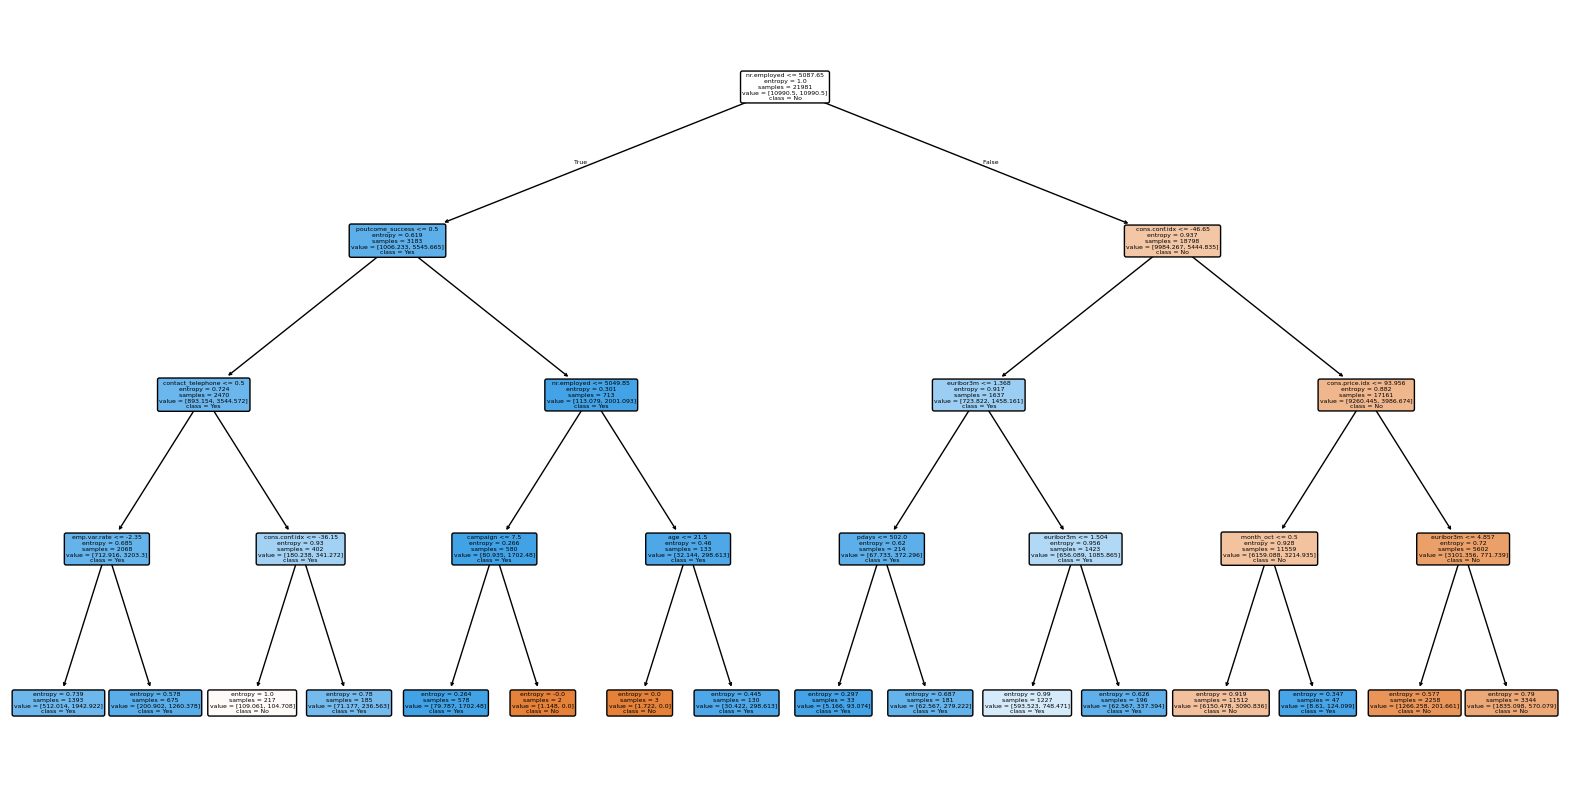

In [ ]:
# Use the Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, class_weight='balanced')

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_val)

# Print evaluation metrics
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(accuracy_score(y_val, y_pred))

dcm = confusion_matrix(y_val, y_pred)

plt.figure()
sns.heatmap(dcm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the decision tree
plt.figure(figsize=(20,10))  # Adjust the size as necessary
tree.plot_tree(dt_model, filled = True, feature_names=x.columns, class_names=['No', 'Yes'], rounded=True)
plt.show()
